## CLUSTERING ANALYSIS 

##### Understanding and Implementing K-Means and Hierarchical Algorithms

##### Objective:
##### The objective of this assignment is to introduce to various clustering algorithms, including K-Means, and hierarchical and provide hands-on experience in applying these techniques to a real-world dataset.
##### Datasets:
##### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
##### Implementing Clustering Algorithms:
##### •	Implement the K-Means and hierarchical algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
##### •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
##### •	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) evaluate the clustering results.

##### Cluster Analysis and Interpretation:
##### •	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

In [1]:
import pandas as pd

In [2]:
df =pd.read_excel("../Clustering/EastWestAirlines.xlsx",sheet_name="data", index_col = "ID#" )
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Data Preprocessing

In [4]:
# 1. Handling missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
df.rename(columns={'Award?':'Award'}, inplace=True)

In [8]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [9]:
df[df.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [12]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

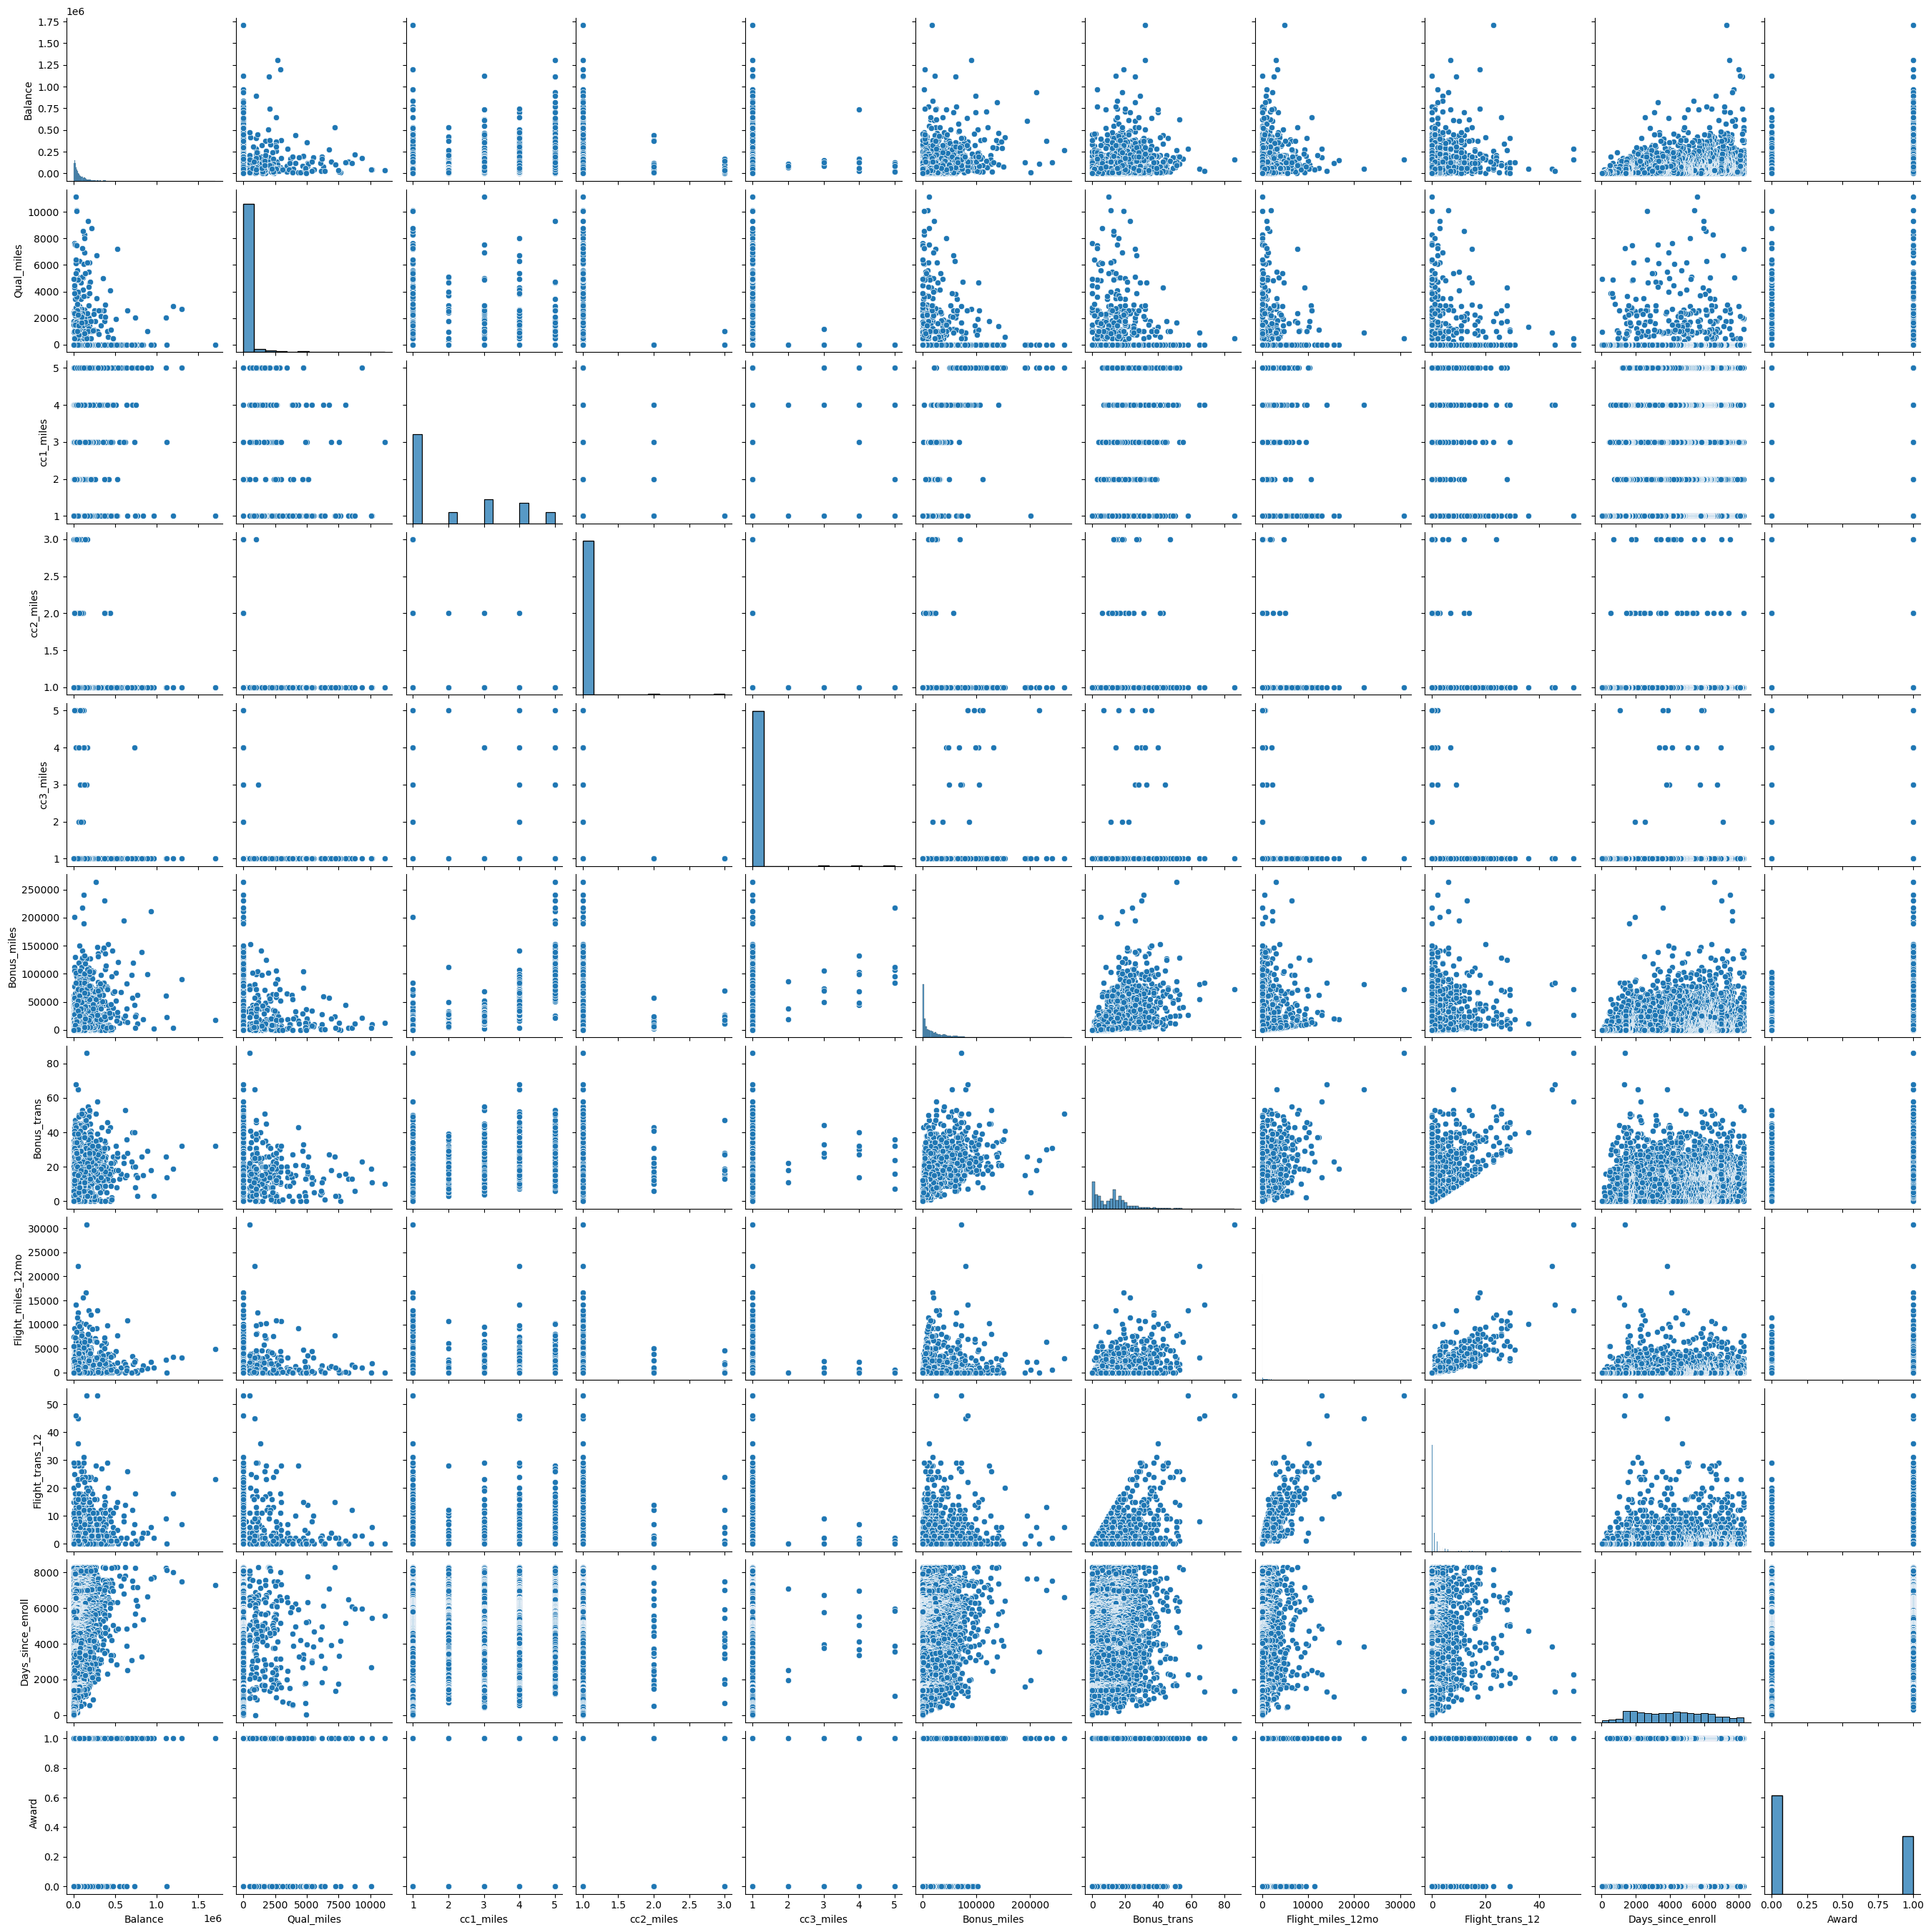

In [13]:
import seaborn as sns
sns.pairplot(df)

In [14]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


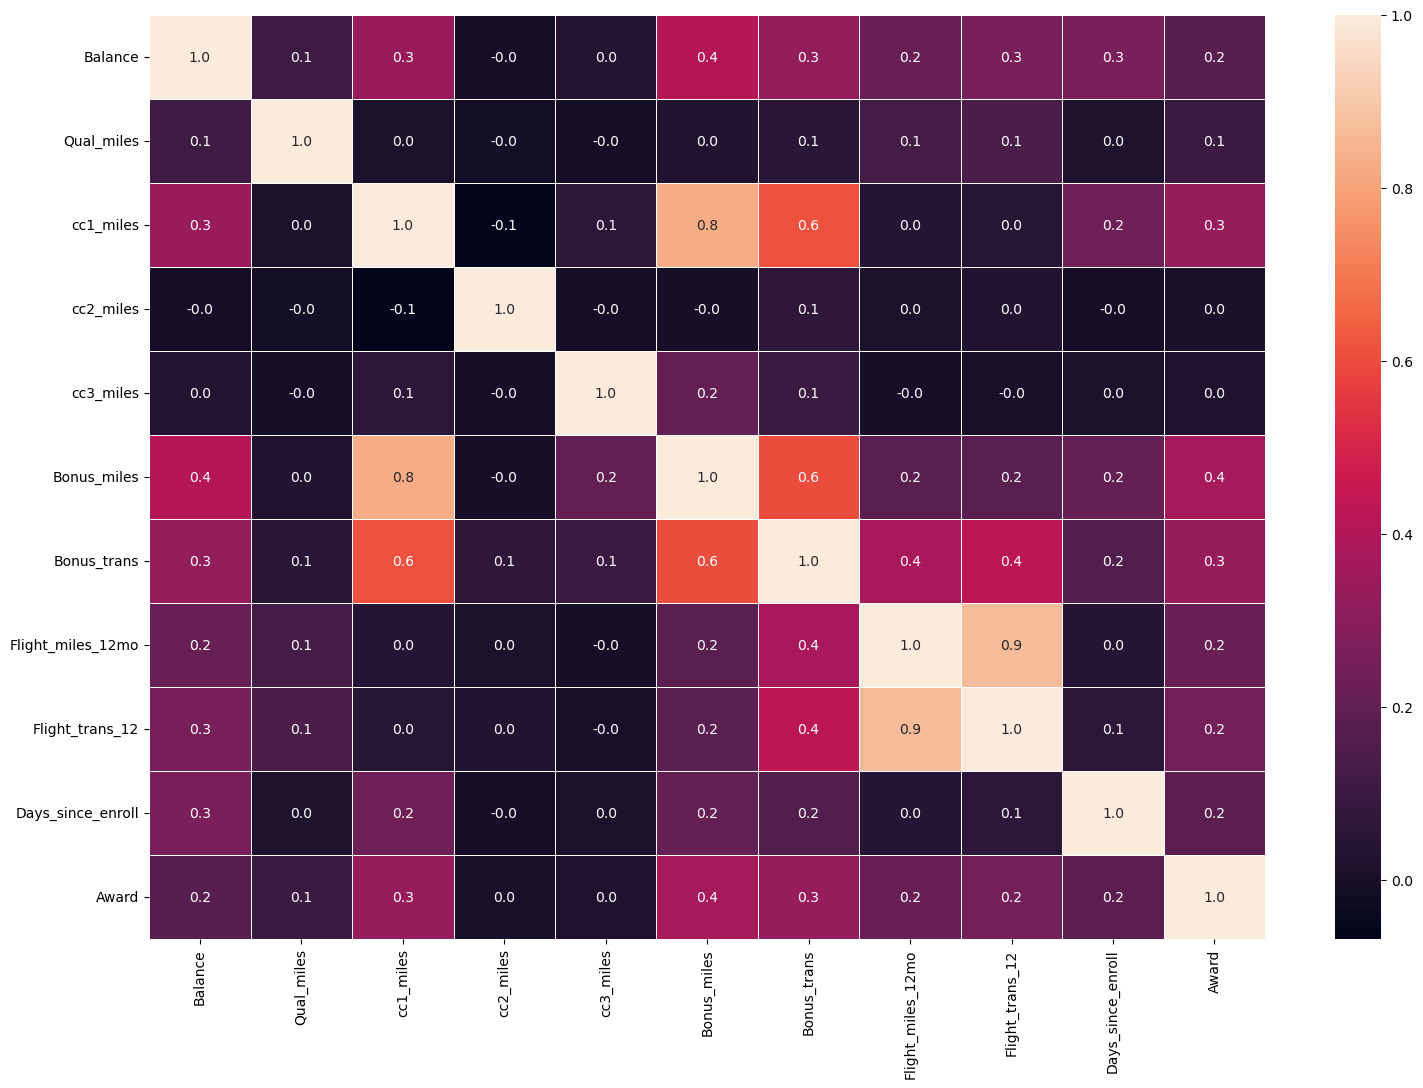

In [15]:
# correlation heatmap
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

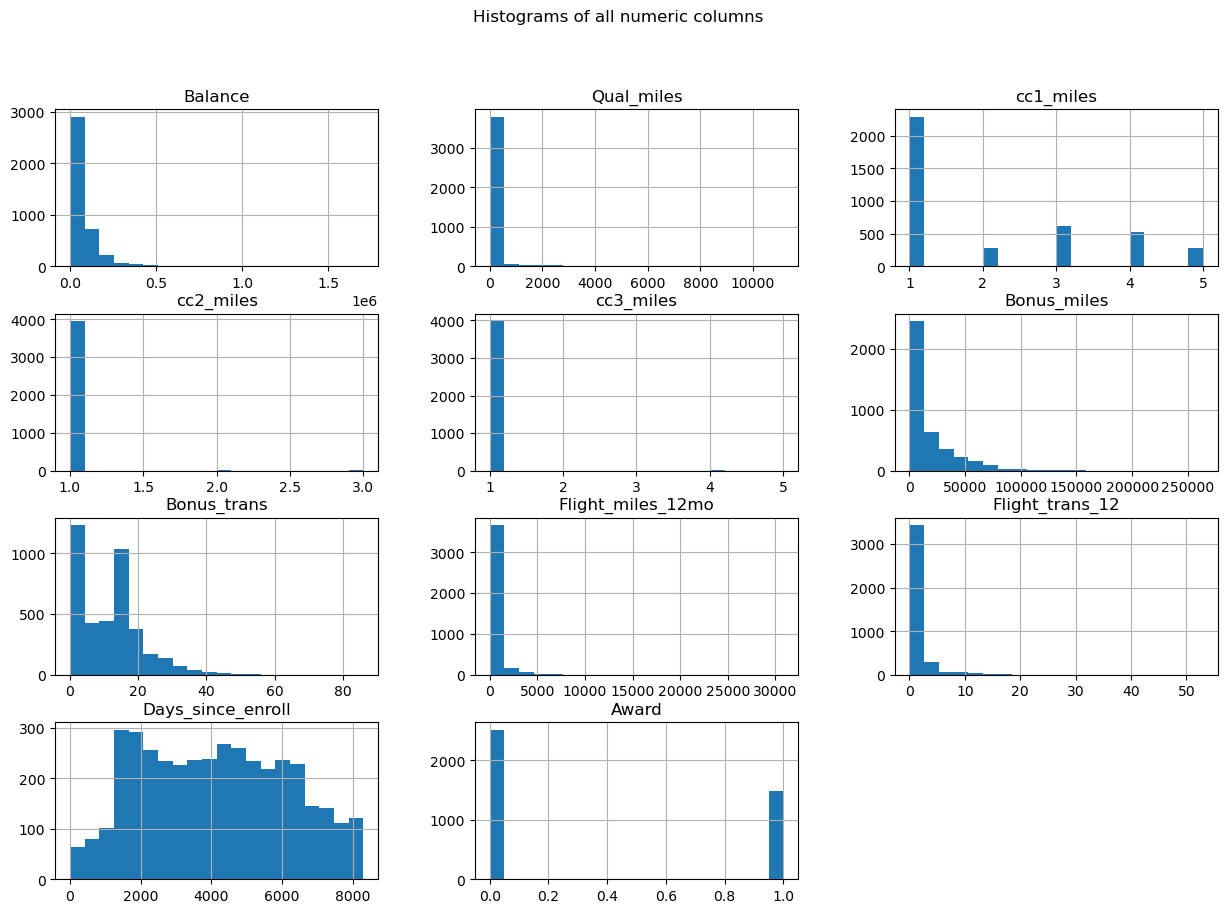

In [16]:
# Plot histograms for data distribution
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of all numeric columns")
plt.show()

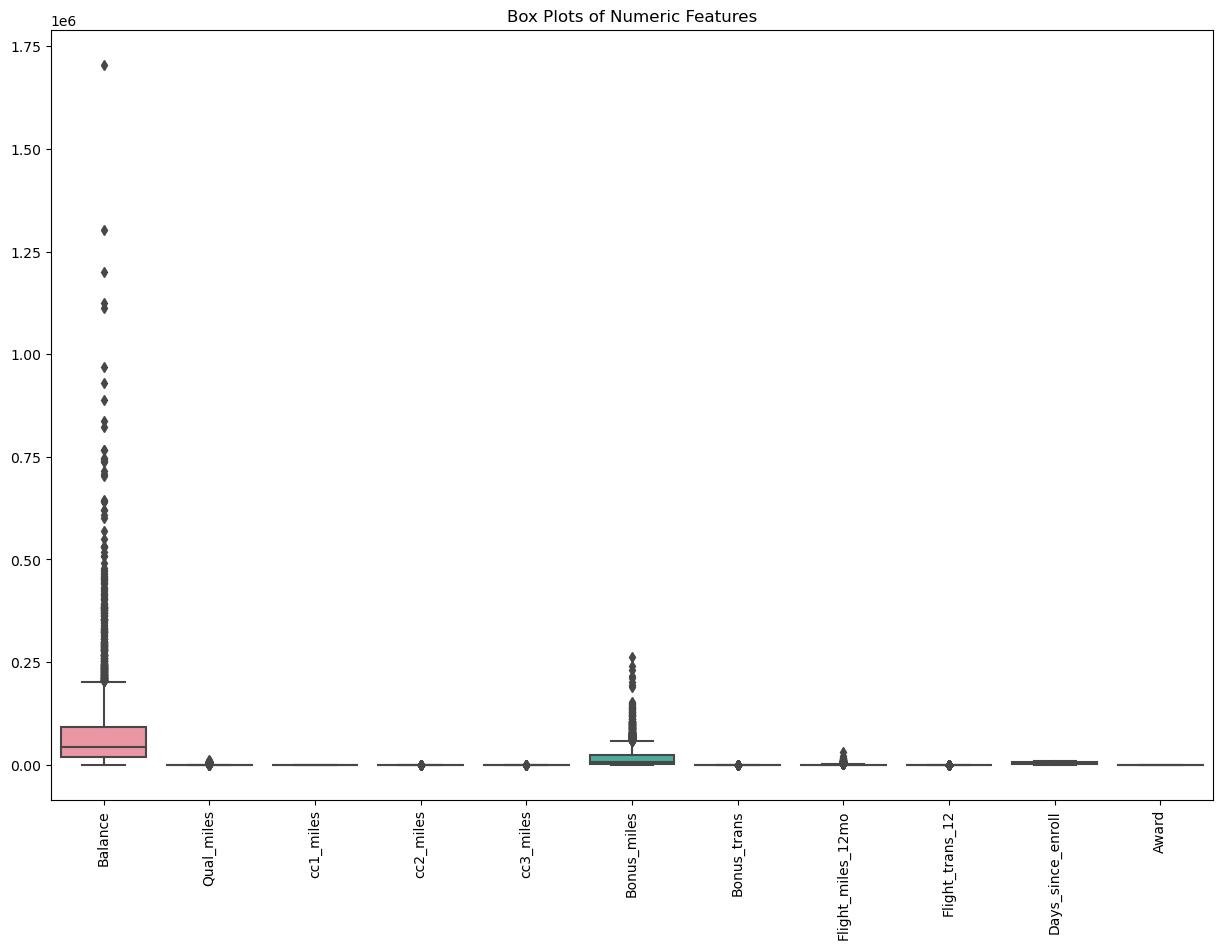

In [17]:
import numpy as np
# Plot box plots for each column to see outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Box Plots of Numeric Features")
plt.xticks(rotation=90)
plt.show()

In [18]:
# 2. Remove outliers using Z-score

In [19]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))  # Only apply to numeric columns
df = df[(z_scores < 3).all(axis=1)]

In [20]:
df_outliers =  df[(z_scores > 3).all(axis=1)]

C:\Users\USER\AppData\Local\Temp\ipykernel_29832\1470671065.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outliers =  df[(z_scores > 3).all(axis=1)]


In [21]:
# Optionally, remove rows with outliers
df_no_outliers = df[(z_scores < 3).all(axis=1)]
df_no_outliers

C:\Users\USER\AppData\Local\Temp\ipykernel_29832\3924396256.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df[(z_scores < 3).all(axis=1)]


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [22]:
from sklearn.preprocessing import StandardScaler
# 3. Feature scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_no_outliers.select_dtypes(include=[np.number]))  # Only scale numeric columns

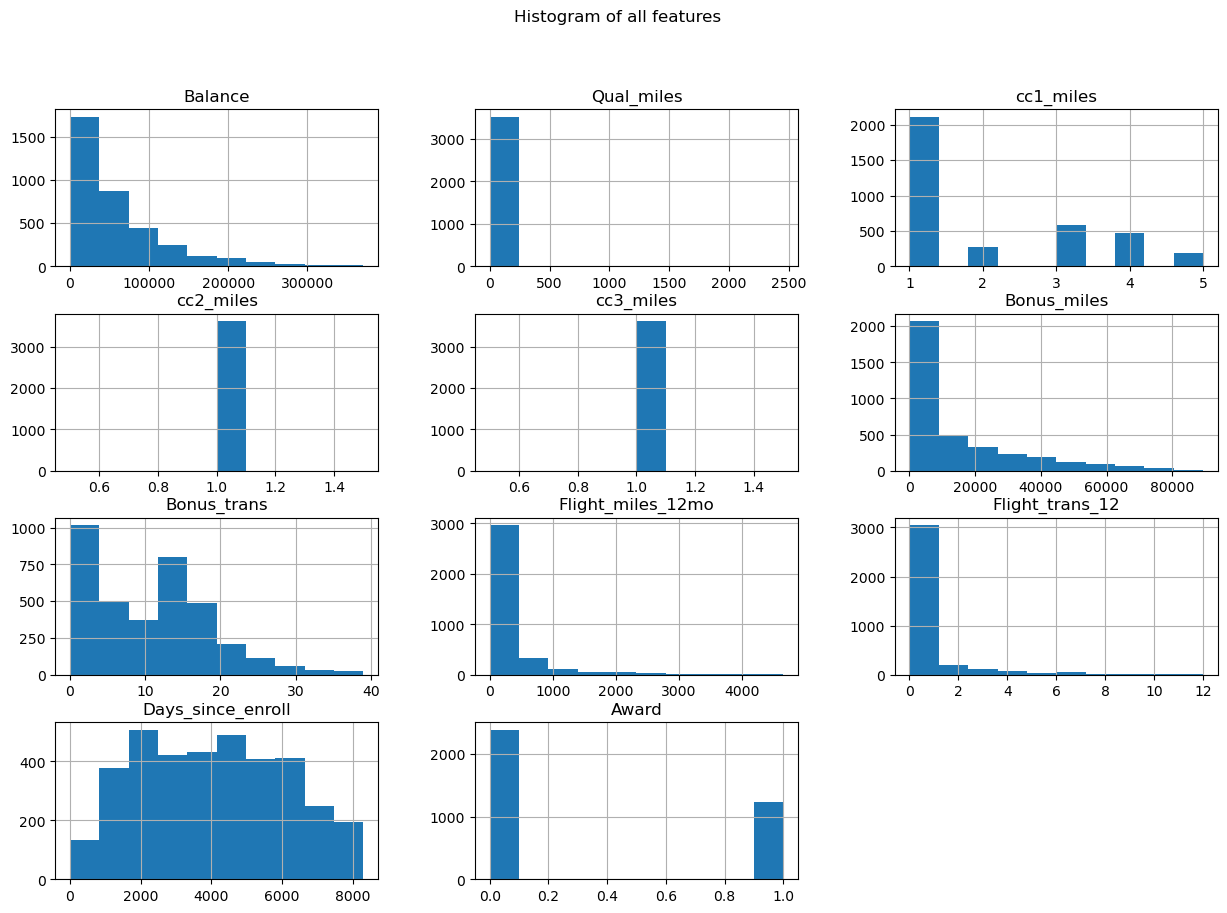

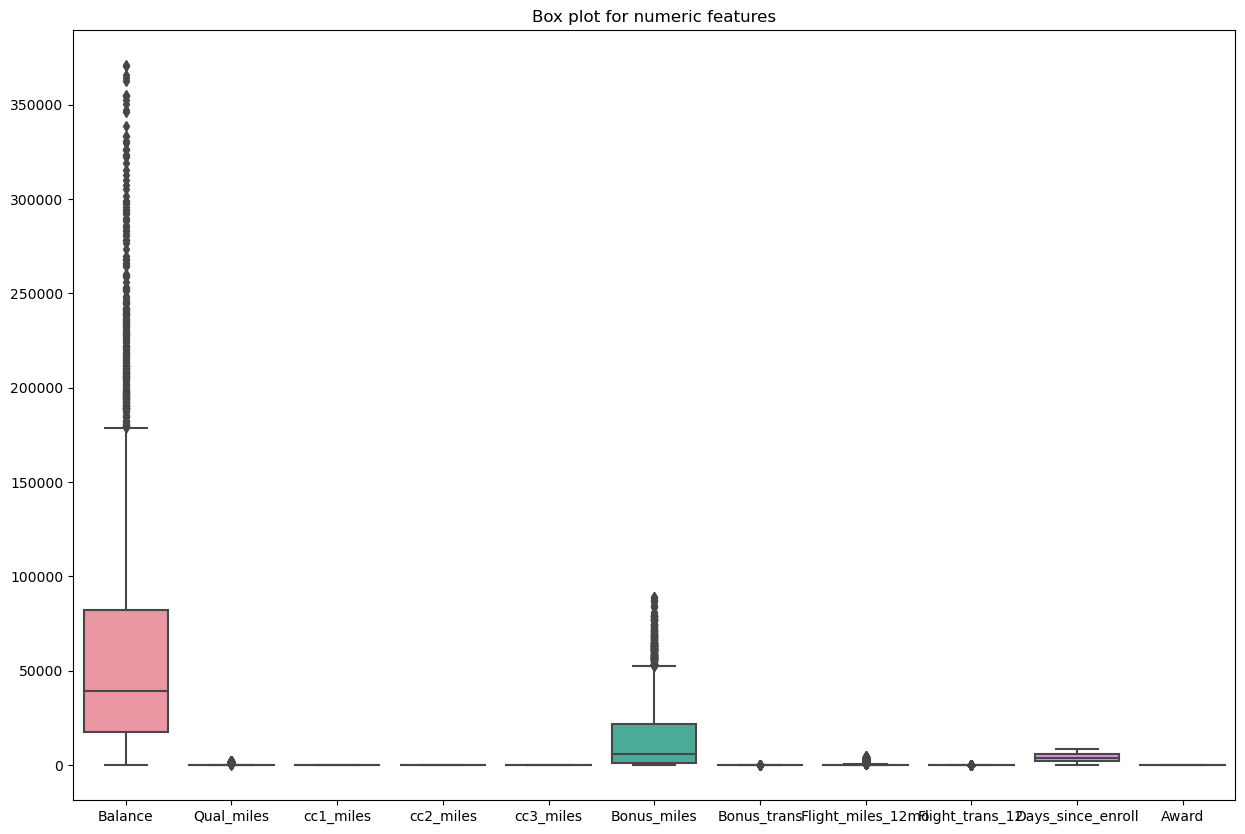

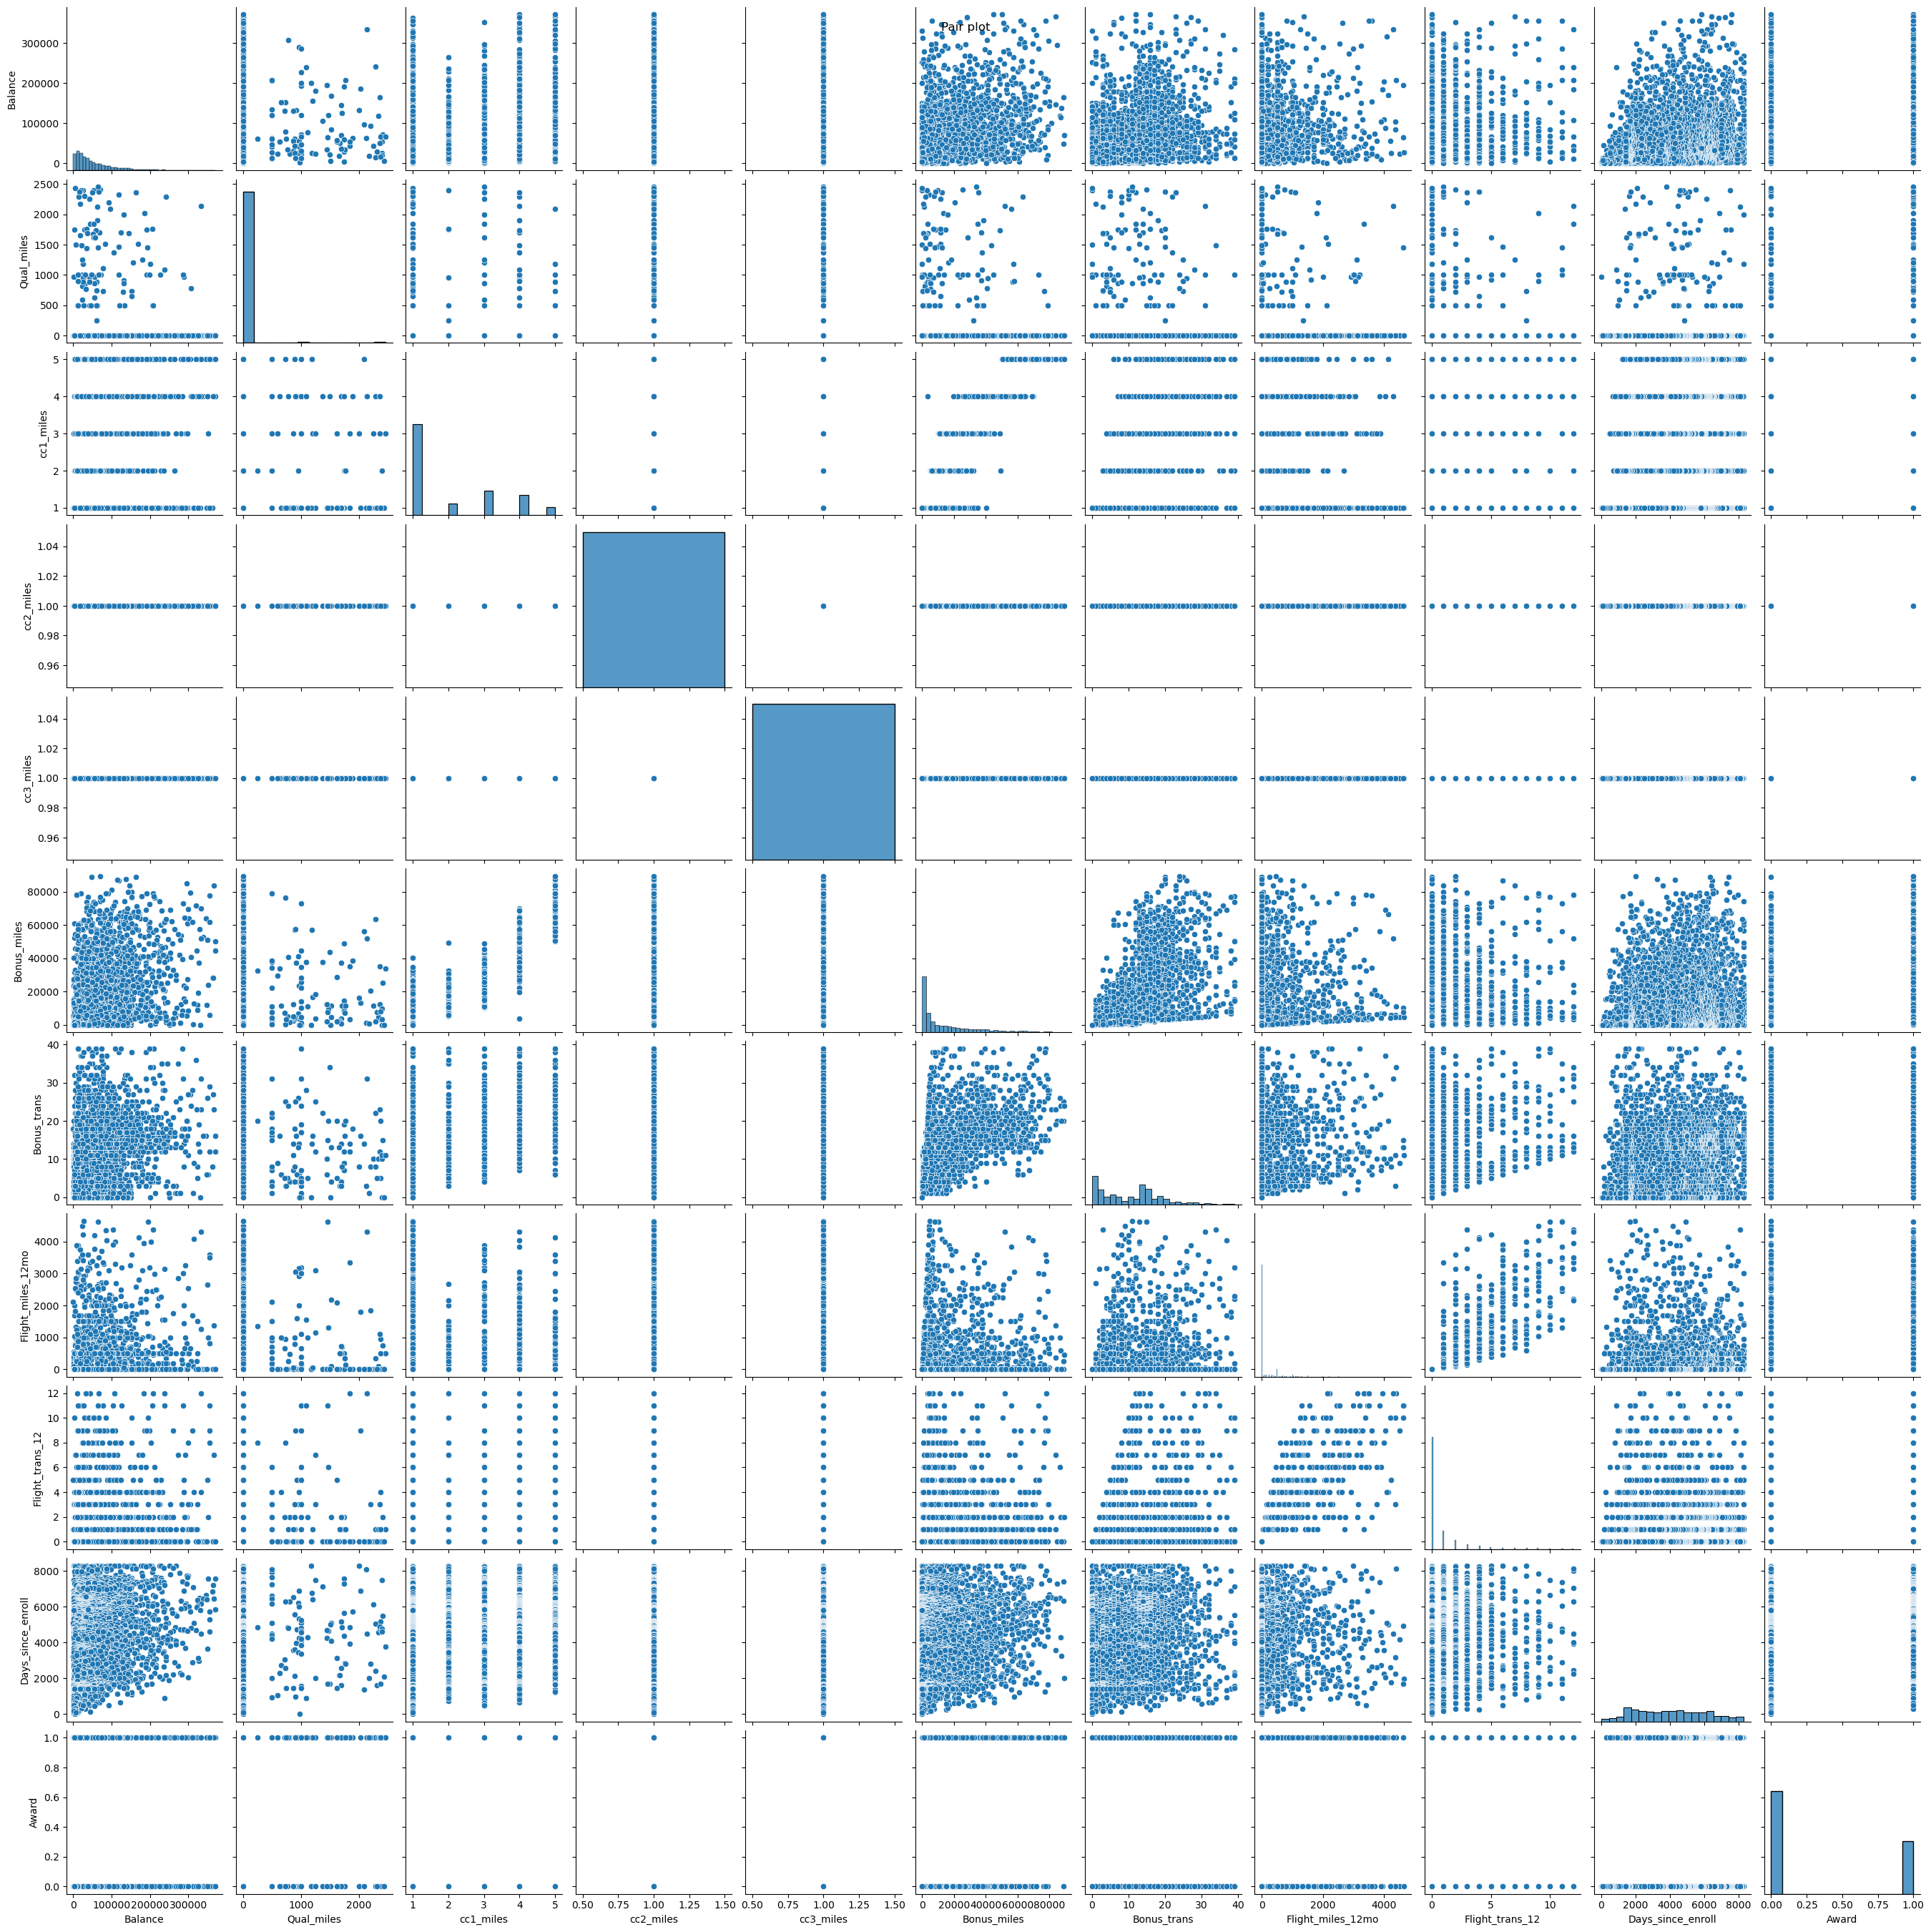

In [23]:
# Exploratory Data Analysis (EDA)

# Histograms
df.hist(bins=10, figsize=(15, 10))
plt.suptitle("Histogram of all features")
plt.show()

# Box plots to check distribution and outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Box plot for numeric features")
plt.show()

# Pair plots for checking clusters visually (select only a few features if dataset is large)
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.suptitle("Pair plot")
plt.show()



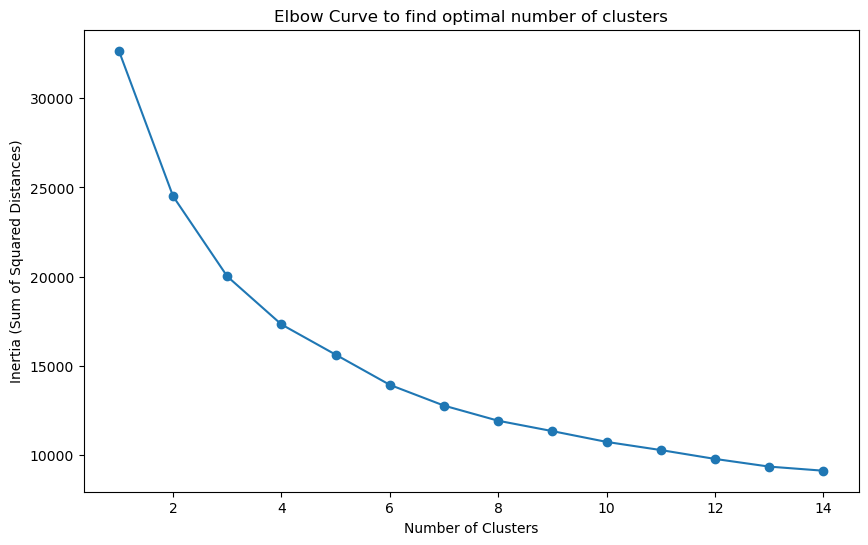

In [30]:
# Implementing K-Means Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Determine the optimal number of clusters using the Elbow Method
cluster_range = range(1, 15)
cluster_errors = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    cluster_errors.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, cluster_errors, marker='o')
plt.title("Elbow Curve to find optimal number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

In [31]:
# Choosing optimal number of clusters (e.g., 3 based on the Elbow plot)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Adding cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans_labels

C:\Users\USER\AppData\Local\Temp\ipykernel_29832\1580044627.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KMeans_Cluster'] = kmeans_labels


In [33]:
from sklearn.metrics import silhouette_score
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
print(f"Silhouette Score for KMeans with {optimal_clusters} clusters: {silhouette_avg}")

Silhouette Score for KMeans with 3 clusters: 0.31904494602107936


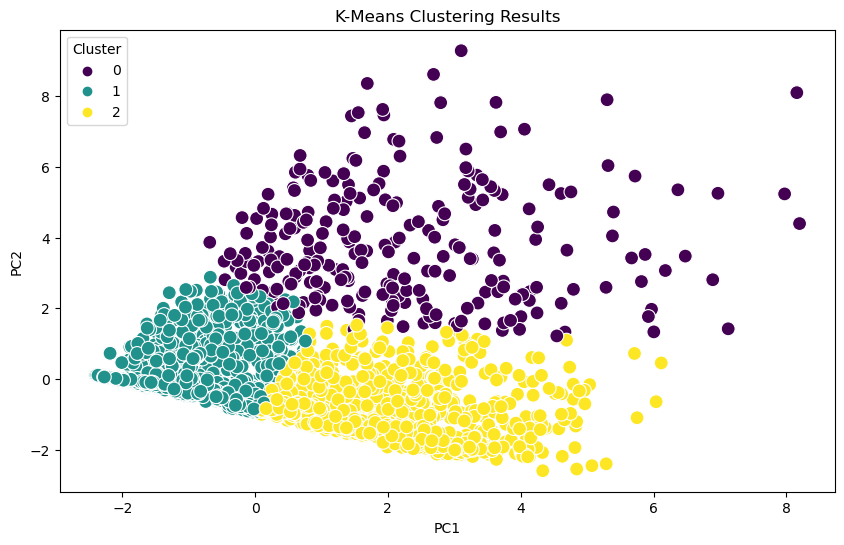

In [35]:
# Visualize clusters (using first two principal components)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title("K-Means Clustering Results")
plt.show()

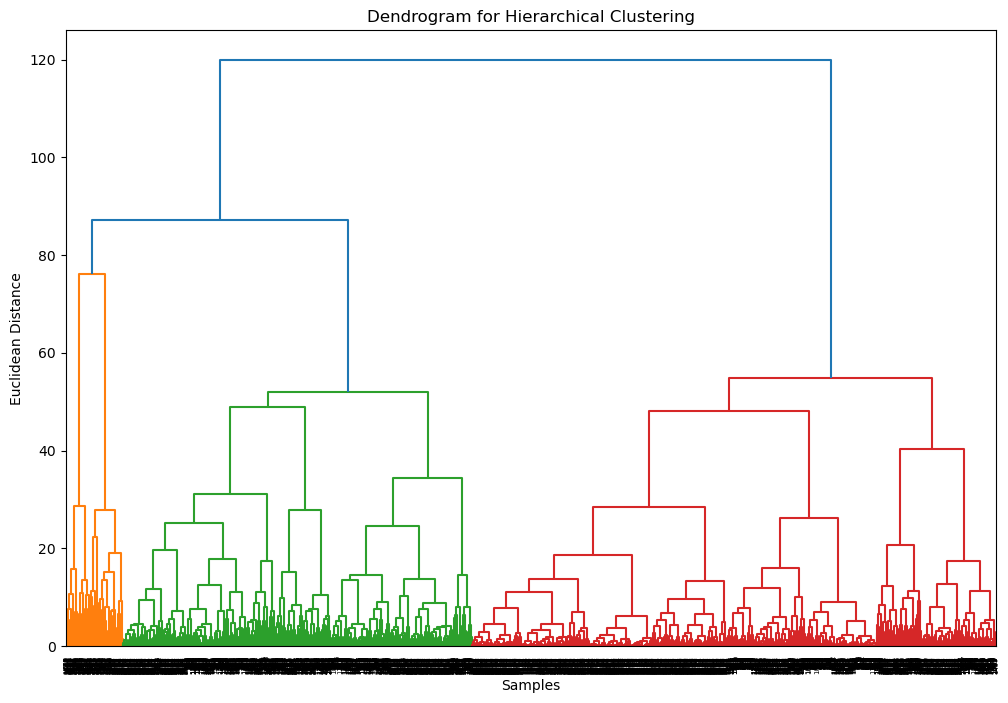

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Implementing Hierarchical Clustering

# Using linkage for hierarchical clustering and creating dendrogram
linkage_type = 'ward'  # Experiment with other types like 'single', 'complete', 'average'
linked = linkage(scaled_df, method=linkage_type)

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()


In [26]:
# Cutting the dendrogram to form clusters
hierarchical_clusters = 3  # Decide based on dendrogram
df['Hierarchical_Cluster'] = fcluster(linked, hierarchical_clusters, criterion='maxclust')

C:\Users\USER\AppData\Local\Temp\ipykernel_29832\1542529899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hierarchical_Cluster'] = fcluster(linked, hierarchical_clusters, criterion='maxclust')


In [34]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical_Cluster,KMeans_Cluster
ID#,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,2


In [36]:
# Cluster Analysis and Interpretation

# Print cluster sizes
print("K-Means Cluster Counts:")
print(df['KMeans_Cluster'].value_counts())
print("\nHierarchical Cluster Counts:")
print(df['Hierarchical_Cluster'].value_counts())


K-Means Cluster Counts:
1    2177
2    1200
0     252
Name: KMeans_Cluster, dtype: int64

Hierarchical Cluster Counts:
1    2044
2    1363
3     222
Name: Hierarchical_Cluster, dtype: int64


In [37]:
# Analyze cluster characteristics by comparing feature means
print("\nK-Means Cluster Analysis:")
print(df.groupby('KMeans_Cluster').mean())

print("\nHierarchical Cluster Analysis:")
print(df.groupby('Hierarchical_Cluster').mean())



K-Means Cluster Analysis:
                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                              
0               95871.626984  160.884921   1.992063        1.0        1.0   
1               37568.937529   30.552595   1.142857        1.0        1.0   
2               94780.973333   30.530000   3.549167        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               18842.023810    15.857143        2176.250000         6.194444   
1                3590.220946     6.047313          94.689022         0.336702   
2               32784.937500    17.353333         145.325833         0.463333   

                Days_since_enroll     Award  Hierarchical_Cluster  
KMeans_Cluster                                                     
0                     4303.511905  0.630952  

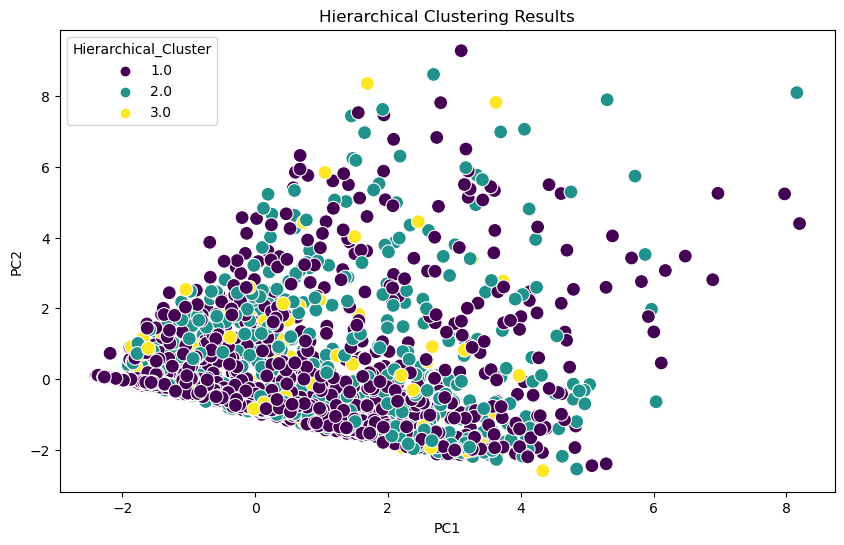

In [38]:
# Visualize Clusters from Hierarchical Clustering in PCA
pca_df['Hierarchical_Cluster'] = df['Hierarchical_Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Hierarchical_Cluster', palette='viridis', s=100)
plt.title("Hierarchical Clustering Results")
plt.show()


K-Means Clustering Analysis:
Based on the table provided, K-Means has identified 3 distinct clusters (0, 1, and 2) with the following characteristics:

Cluster 0 (Higher Engagement and Balance):

Balance: High average balance of 95,871.
Qual_miles: Relatively high at 160.
Bonus_miles & Bonus_trans: High, with an average of 18,842 bonus miles and 15 bonus transactions.
Flight_miles_12mo: Very high with an average of 2,176 miles flown in the past 12 months, suggesting high engagement with the airline.
Award: High proportion of awards (63%).
Days_since_enroll: Long enrollment duration, indicating loyal, long-term customers.
Interpretation: This cluster likely represents loyal, high-value customers who actively engage with the airline, accumulate bonus miles, and frequently fly. These customers have been enrolled for a long time and are often awarded.

Cluster 1 (Lower Engagement and Balance):

Balance: Much lower average balance at 37,568.
Qual_miles: Low at 30.
Bonus_miles & Bonus_trans: Low engagement with only 3,590 bonus miles and 6 bonus transactions on average.
Flight_miles_12mo: Very low flight miles with minimal travel activity (95 miles in the past year).
Award: Low award rate (18%).
Days_since_enroll: Shorter enrollment duration.
Interpretation: This cluster represents low-engagement, low-value customers who do not frequently travel and are relatively new to the airline. They are not engaged with bonus programs and have a low award rate.

Cluster 2 (Moderate Engagement with High Bonus Miles):

Balance: High balance at 94,780, close to Cluster 0.
Qual_miles: Low at 30.
Bonus_miles & Bonus_trans: Very high bonus miles (32,784) but lower flight miles than Cluster 0.
Flight_miles_12mo: Low flight miles, similar to Cluster 1.
Award: High award rate at 56%.
Days_since_enroll: Long enrollment duration.
Interpretation: This cluster might represent customers who primarily engage with the bonus program, accumulating bonus miles without necessarily traveling frequently. They are awarded often, indicating engagement through promotional offers rather than actual travel activity.

Hierarchical Clustering Analysis:
For Hierarchical Clustering, three clusters (1, 2, and 3) were identified with the following insights:

Cluster 1 (Low Balance and Engagement):

Balance: Low average balance of 33,822.
Qual_miles: Very low at 0.24.
Bonus_miles & Bonus_trans: Very low bonus miles and transactions, indicating low engagement.
Flight_miles_12mo: Low flight miles, with minimal engagement in travel.
Award: Low at 18%.
Days_since_enroll: Moderate at around 3,730 days.
Interpretation: This cluster includes low-engagement, low-value customers with minimal travel and low bonus miles. They are unlikely to be frequent travelers and may not be profitable customers.

Cluster 2 (Moderate Balance with High Bonus Miles):

Balance: High balance at 94,359.
Qual_miles: Moderate at 1.47.
Bonus_miles & Bonus_trans: High bonus miles (29,713) and frequent bonus transactions.
Flight_miles_12mo: Slightly higher than Cluster 1 but still moderate.
Award: Award rate is moderate at 52%.
Days_since_enroll: Long enrollment period (4,555 days).
Interpretation: This cluster is moderately engaged with the airline, showing a higher preference for accumulating bonus miles rather than actively flying. They are likely customers who value loyalty programs.

Cluster 3 (High Balance and High Engagement):

Balance: Very high at 98,828.
Qual_miles: High at 636, indicating active qualification miles.
Bonus_miles & Bonus_trans: High bonus engagement with 21,299 miles and 15 transactions.
Flight_miles_12mo: Very high flight miles (1,734), showing frequent travel.
Award: Highest award rate at 64%.
Days_since_enroll: High, indicating long-term customers.
Interpretation: This cluster represents the high-value, high-engagement customers. These customers actively travel, accumulate miles, and are highly engaged with the airline. They are loyal, long-term customers who represent significant value to the airline.

Concluding Insights:
K-Means vs. Hierarchical Clustering Results: Both K-Means and Hierarchical clustering identified similar groups of low, moderate, and high-value customers. However, K-Means appears to separate clusters more based on travel frequency and bonus miles, while Hierarchical clustering gives a more nuanced separation based on balance and miles.

Customer Segmentation Insight: Both clustering methods indicate that there are:

Low-value customers who do not engage much with the airline or bonus programs.
Moderate-value customers who accumulate bonus miles but travel infrequently.
High-value customers who are frequent travelers, actively participate in loyalty programs, and have high balances.
Business Implication: The airline may target:

High-value customers with exclusive loyalty benefits to retain their engagement.
Moderate-value customers with incentives to increase travel frequency.
Low-value customers with entry-level offers to encourage initial engagement.
By understanding these clusters, the airline can tailor marketing strategies and customer loyalty programs effectively to maximize customer satisfaction and profitability.